(Project Of MachineLearning)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection  import SelectPercentile
from sklearn.feature_selection  import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score    
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OrdinalEncoder
import joblib





In [57]:
data=pd.read_csv('D:/ml_sadat/digital_marketing_campaign_dataset.csv')

In [58]:
data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56.0,Female,136912,Social Media,Awareness,9998.870068,0.043919,0.088031,0,2.399017,7.396803,19.0,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69.0,Male,41760,Email,Retention,12610.668606,0.155725,0.182725,42,2.917138,5.352549,5.0,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46.0,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,NaN,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,NaN,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89.0,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60.0,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,NaN,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21.0,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70.0,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43.0,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52.0,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28.0,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38.0,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19.0,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86.0,1,5,7,2709,IsConfid,ToolConfid,1


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  7986 non-null   float64
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     7990 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         7987 non-null   float64
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [60]:
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56.0,Female,136912,Social Media,Awareness,9998.870068,0.043919,0.088031,0,2.399017,7.396803,19.0,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69.0,Male,41760,Email,Retention,12610.668606,0.155725,0.182725,42,2.917138,5.352549,5.0,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46.0,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,NaN,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,NaN,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89.0,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60.0,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,NaN,6,6,8,4345,IsConfid,ToolConfid,1


Dropping Unnecessary Columns

In [61]:
data_cleaned = data.drop(columns=["CustomerID", "AdvertisingPlatform", "AdvertisingTool"])
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                7986 non-null   float64
 1   Gender             8000 non-null   object 
 2   Income             8000 non-null   int64  
 3   CampaignChannel    8000 non-null   object 
 4   CampaignType       8000 non-null   object 
 5   AdSpend            8000 non-null   float64
 6   ClickThroughRate   7990 non-null   float64
 7   ConversionRate     8000 non-null   float64
 8   WebsiteVisits      8000 non-null   int64  
 9   PagesPerVisit      8000 non-null   float64
 10  TimeOnSite         8000 non-null   float64
 11  SocialShares       7987 non-null   float64
 12  EmailOpens         8000 non-null   int64  
 13  EmailClicks        8000 non-null   int64  
 14  PreviousPurchases  8000 non-null   int64  
 15  LoyaltyPoints      8000 non-null   int64  
 16  Conversion         8000 

data preproccing to ensure Nulls Values

In [62]:
data_cleaned.isna().sum()

Age                  14
Gender                0
Income                0
CampaignChannel       0
CampaignType          0
AdSpend               0
ClickThroughRate     10
ConversionRate        0
WebsiteVisits         0
PagesPerVisit         0
TimeOnSite            0
SocialShares         13
EmailOpens            0
EmailClicks           0
PreviousPurchases     0
LoyaltyPoints         0
Conversion            0
dtype: int64

In [63]:
data_cleaned['Age'].fillna(data_cleaned['Age'].mean(), inplace=True)
data_cleaned['SocialShares'].fillna(data_cleaned['SocialShares'].mean(), inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_22824\757893278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Age'].fillna(data_cleaned['Age'].mean(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_22824\757893278.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [64]:
data_cleaned['ClickThroughRate'].fillna(data_cleaned['ClickThroughRate'].median(), inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_22824\3362412822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['ClickThroughRate'].fillna(data_cleaned['ClickThroughRate'].median(), inplace=True)


In [65]:
data_cleaned.isna().sum()

Age                  0
Gender               0
Income               0
CampaignChannel      0
CampaignType         0
AdSpend              0
ClickThroughRate     0
ConversionRate       0
WebsiteVisits        0
PagesPerVisit        0
TimeOnSite           0
SocialShares         0
EmailOpens           0
EmailClicks          0
PreviousPurchases    0
LoyaltyPoints        0
Conversion           0
dtype: int64

In [66]:
data_cleaned.describe()

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,43.627097,84664.196750,5004.354830,0.154755,0.104389,24.751625,5.549299,7.727718,49.834857,9.476875,4.467375,4.485500,2490.268500,0.876500
std,14.890766,37580.387945,2842.883547,0.083937,0.054878,14.312269,2.607358,4.228218,28.868591,5.711111,2.856564,2.888093,1429.527162,0.329031
min,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,51744.500000,2523.221165,0.082648,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,43.000000,84926.500000,5016.936045,0.154403,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,56.000000,116815.750000,7411.653402,0.228003,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,69.000000,149986.000000,15000.048130,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


Define Outliers

In [67]:
data_cleaned.shape

(8000, 17)

In [68]:
data['AdSpend'].describe()

count     8000.000000
mean      5004.354830
std       2842.883547
min        100.054813
25%       2523.221165
50%       5016.936045
75%       7411.653402
max      15000.048130
Name: AdSpend, dtype: float64

In [69]:
data.boxplot('AdSpend')

<Axes: >

In [70]:
data_cleaned[data['AdSpend']>9900].shape

(86, 17)

In [71]:
Data=data_cleaned[data['AdSpend']<9900]
Data.shape

(7914, 17)

In [72]:
rangeData=data_cleaned[data['AdSpend']<9900]
outlierData=data_cleaned[data['AdSpend']>=9900]
outlierAcecpted=outlierData.sample(frac=0.5)
print(outlierAcecpted.shape )


(43, 17)


In [73]:
data_final=pd.concat([rangeData,outlierAcecpted],axis=0)
data_final.shape

(7957, 17)

Encoding of data

In [74]:
#encoding the categorical data
le=LabelEncoder()
data_final['CampaignChannel']=le.fit_transform(data_final['CampaignChannel'])
data_final['CampaignType']=le.fit_transform(data_final['CampaignType'])
data_final['Gender']=le.fit_transform(data_final['Gender'])

data_final.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
2,46.000000,0,88456,1,0,1546.429596,0.277490,0.076423,2,8.223619,13.794901,49.834857,11,2,8,2337,1
3,43.627097,0,44085,1,2,539.525936,0.137611,0.088004,47,4.540939,14.688363,89.000000,2,2,0,2463,1
4,60.000000,0,83964,1,2,1678.043573,0.252851,0.109940,0,2.046847,13.993370,49.834857,6,6,8,4345,1
5,25.000000,0,42925,4,0,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95.000000,5,8,0,3316,1
6,38.000000,0,25615,2,0,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54.000000,14,3,6,930,1


feature Selection 

In [75]:
x = data_final.drop(columns=['Conversion']) 
y = data_final['Conversion']
x

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
2,46.000000,0,88456,1,0,1546.429596,0.277490,0.076423,2,8.223619,13.794901,49.834857,11,2,8,2337
3,43.627097,0,44085,1,2,539.525936,0.137611,0.088004,47,4.540939,14.688363,89.000000,2,2,0,2463
4,60.000000,0,83964,1,2,1678.043573,0.252851,0.109940,0,2.046847,13.993370,49.834857,6,6,8,4345
5,25.000000,0,42925,4,0,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95.000000,5,8,0,3316
6,38.000000,0,25615,2,0,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54.000000,14,3,6,930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,57.000000,0,111586,3,3,9952.527856,0.116833,0.098164,7,4.512654,11.941266,10.000000,17,5,3,4936
6078,52.000000,0,140196,1,2,9929.034769,0.118367,0.187850,19,7.279459,7.278934,50.000000,4,4,4,2443
6382,44.000000,0,87275,0,2,9997.914781,0.189383,0.034979,23,4.122796,13.668689,22.000000,17,7,1,4879
2371,51.000000,0,25432,0,2,9944.814320,0.196672,0.107012,31,5.336202,6.014161,38.000000,1,1,2,1183


In [76]:

featureSelect = SelectPercentile(score_func=f_classif, percentile=75)
selectedFeatures = featureSelect.fit_transform(x,y)
data_full=pd.DataFrame(selectedFeatures,columns=[i for i,j in zip(x.columns,featureSelect.get_support()) if j])
data_full

,Income,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,88456.0,0.0,1546.429596,0.277490,0.076423,2.0,8.223619,13.794901,11.0,2.0,8.0,2337.0
1,44085.0,2.0,539.525936,0.137611,0.088004,47.0,4.540939,14.688363,2.0,2.0,0.0,2463.0
2,83964.0,2.0,1678.043573,0.252851,0.109940,0.0,2.046847,13.993370,6.0,6.0,8.0,4345.0
3,42925.0,0.0,9579.388247,0.153795,0.161316,6.0,2.125850,7.752831,5.0,8.0,0.0,3316.0
4,25615.0,0.0,7302.899852,0.040975,0.060977,42.0,1.753995,10.698672,14.0,3.0,6.0,930.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7952,111586.0,3.0,9952.527856,0.116833,0.098164,7.0,4.512654,11.941266,17.0,5.0,3.0,4936.0
7953,140196.0,2.0,9929.034769,0.118367,0.187850,19.0,7.279459,7.278934,4.0,4.0,4.0,2443.0
7954,87275.0,2.0,9997.914781,0.189383,0.034979,23.0,4.122796,13.668689,17.0,7.0,1.0,4879.0
7955,25432.0,2.0,9944.814320,0.196672,0.107012,31.0,5.336202,6.014161,1.0,1.0,2.0,1183.0


Data Scaling   >> define the important feature to apply this

In [77]:
data_final.corr()['Conversion']

Age                  0.000977
Gender               0.002197
Income               0.013283
CampaignChannel     -0.004769
CampaignType         0.030897
AdSpend              0.125312
ClickThroughRate     0.119995
ConversionRate       0.095290
WebsiteVisits        0.077612
PagesPerVisit        0.101284
TimeOnSite           0.130454
SocialShares        -0.011368
EmailOpens           0.123847
EmailClicks          0.128362
PreviousPurchases    0.111867
LoyaltyPoints        0.094909
Conversion           1.000000
Name: Conversion, dtype: float64

In [78]:
data_final.corr()['Conversion'].sort_values(ascending=False)

Conversion           1.000000
TimeOnSite           0.130454
EmailClicks          0.128362
AdSpend              0.125312
EmailOpens           0.123847
ClickThroughRate     0.119995
PreviousPurchases    0.111867
PagesPerVisit        0.101284
ConversionRate       0.095290
LoyaltyPoints        0.094909
WebsiteVisits        0.077612
CampaignType         0.030897
Income               0.013283
Gender               0.002197
Age                  0.000977
CampaignChannel     -0.004769
SocialShares        -0.011368
Name: Conversion, dtype: float64

In [79]:
data_final.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
2,46.000000,0,88456,1,0,1546.429596,0.277490,0.076423,2,8.223619,13.794901,49.834857,11,2,8,2337,1
3,43.627097,0,44085,1,2,539.525936,0.137611,0.088004,47,4.540939,14.688363,89.000000,2,2,0,2463,1
4,60.000000,0,83964,1,2,1678.043573,0.252851,0.109940,0,2.046847,13.993370,49.834857,6,6,8,4345,1
5,25.000000,0,42925,4,0,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95.000000,5,8,0,3316,1
6,38.000000,0,25615,2,0,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54.000000,14,3,6,930,1


In [80]:
data_full

,Income,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,88456.0,0.0,1546.429596,0.277490,0.076423,2.0,8.223619,13.794901,11.0,2.0,8.0,2337.0
1,44085.0,2.0,539.525936,0.137611,0.088004,47.0,4.540939,14.688363,2.0,2.0,0.0,2463.0
2,83964.0,2.0,1678.043573,0.252851,0.109940,0.0,2.046847,13.993370,6.0,6.0,8.0,4345.0
3,42925.0,0.0,9579.388247,0.153795,0.161316,6.0,2.125850,7.752831,5.0,8.0,0.0,3316.0
4,25615.0,0.0,7302.899852,0.040975,0.060977,42.0,1.753995,10.698672,14.0,3.0,6.0,930.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7952,111586.0,3.0,9952.527856,0.116833,0.098164,7.0,4.512654,11.941266,17.0,5.0,3.0,4936.0
7953,140196.0,2.0,9929.034769,0.118367,0.187850,19.0,7.279459,7.278934,4.0,4.0,4.0,2443.0
7954,87275.0,2.0,9997.914781,0.189383,0.034979,23.0,4.122796,13.668689,17.0,7.0,1.0,4879.0
7955,25432.0,2.0,9944.814320,0.196672,0.107012,31.0,5.336202,6.014161,1.0,1.0,2.0,1183.0


In [81]:
scaler = StandardScaler()
scaler.fit(data_full)
data_full = scaler.transform(data_full)
data_full=pd.DataFrame(data_full,columns=[i for i,j in zip(x.columns,featureSelect.get_support()) if j])
data_full

,Income,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,0.101574,-1.347602,-1.214117,1.460889,-0.509398,-1.589459,1.025786,1.434474,0.266142,-0.864705,1.217397,-0.107105
1,-1.078791,0.451688,-1.570472,-0.204948,-0.298274,1.555199,-0.386306,1.645815,-1.309914,-0.864705,-1.551950,-0.018922
2,-0.017923,0.451688,-1.167537,1.167457,0.101608,-1.729222,-1.342643,1.481420,-0.609445,0.536610,1.217397,1.298231
3,-1.109649,-1.347602,1.628843,-0.012217,1.038170,-1.309934,-1.312350,0.005265,-0.784562,1.237268,-1.551950,0.578066
4,-1.570133,-1.347602,0.823167,-1.355796,-0.790970,1.205793,-1.454935,0.702083,0.791495,-0.514376,0.525060,-1.091820
...,...,...,...,...,...,...,...,...,...,...,...,...
7952,0.716883,1.351333,1.760902,-0.452395,-0.113074,-1.240053,-0.397151,0.996009,1.316847,0.186281,-0.513445,1.711853
7953,1.477971,0.451688,1.752588,-0.434135,1.521878,-0.401477,0.663756,-0.106832,-0.959679,-0.164047,-0.167276,-0.032919
7954,0.070157,0.451688,1.776965,0.411614,-1.264899,-0.121952,-0.546639,1.404619,1.316847,0.886939,-1.205781,1.671961
7955,-1.575001,0.451688,1.758172,0.498420,0.048225,0.437098,-0.081369,-0.406005,-1.485032,-1.215034,-0.859613,-0.914754


Data spliting

In [82]:
X = data_full
X

,Income,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,0.101574,-1.347602,-1.214117,1.460889,-0.509398,-1.589459,1.025786,1.434474,0.266142,-0.864705,1.217397,-0.107105
1,-1.078791,0.451688,-1.570472,-0.204948,-0.298274,1.555199,-0.386306,1.645815,-1.309914,-0.864705,-1.551950,-0.018922
2,-0.017923,0.451688,-1.167537,1.167457,0.101608,-1.729222,-1.342643,1.481420,-0.609445,0.536610,1.217397,1.298231
3,-1.109649,-1.347602,1.628843,-0.012217,1.038170,-1.309934,-1.312350,0.005265,-0.784562,1.237268,-1.551950,0.578066
4,-1.570133,-1.347602,0.823167,-1.355796,-0.790970,1.205793,-1.454935,0.702083,0.791495,-0.514376,0.525060,-1.091820
...,...,...,...,...,...,...,...,...,...,...,...,...
7952,0.716883,1.351333,1.760902,-0.452395,-0.113074,-1.240053,-0.397151,0.996009,1.316847,0.186281,-0.513445,1.711853
7953,1.477971,0.451688,1.752588,-0.434135,1.521878,-0.401477,0.663756,-0.106832,-0.959679,-0.164047,-0.167276,-0.032919
7954,0.070157,0.451688,1.776965,0.411614,-1.264899,-0.121952,-0.546639,1.404619,1.316847,0.886939,-1.205781,1.671961
7955,-1.575001,0.451688,1.758172,0.498420,0.048225,0.437098,-0.081369,-0.406005,-1.485032,-1.215034,-0.859613,-0.914754


Using train/test 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6365, 12) (1592, 12) (6365,) (1592,)


### visualization

In [84]:
def klopter(feature):
    global data_full
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(data_full[feature], shade=True)
    plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_22824\2973816167.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_full[feature], shade=True)


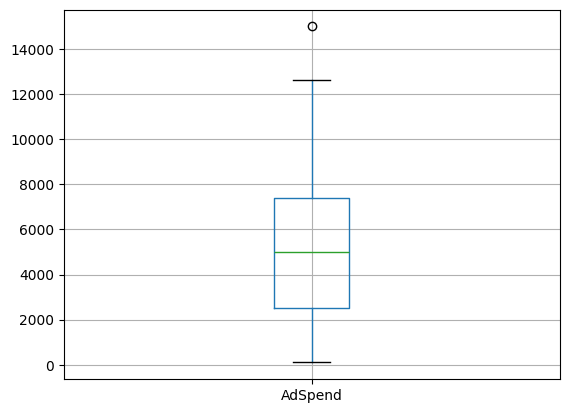

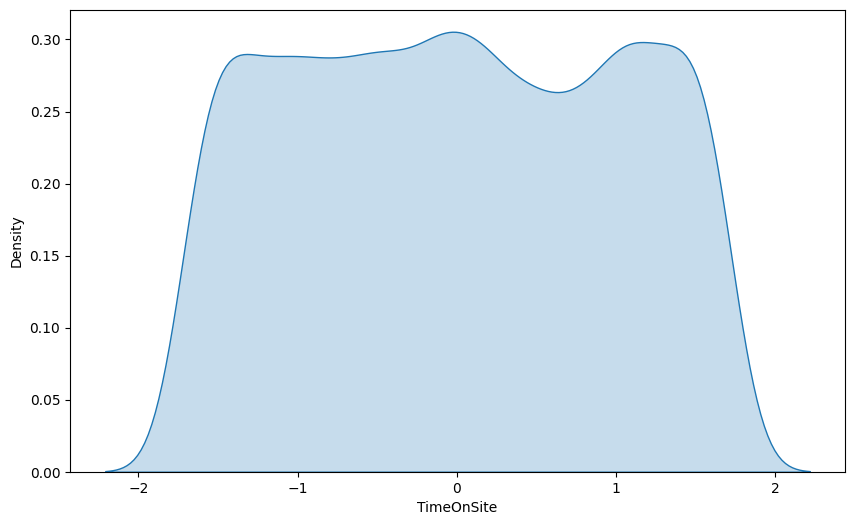

In [85]:
klopter('TimeOnSite')

C:\Users\dell\AppData\Local\Temp\ipykernel_22824\2973816167.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_full[feature], shade=True)


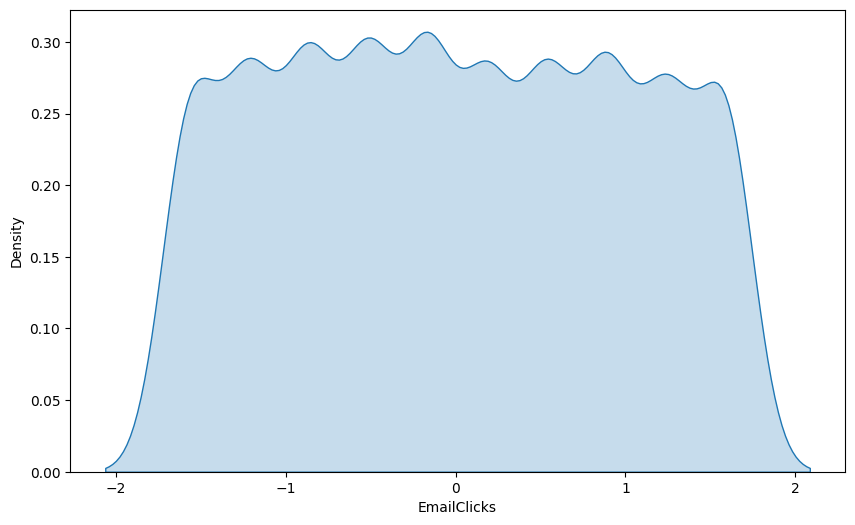

In [86]:
klopter('EmailClicks')

In [87]:
data_final

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
2,46.000000,0,88456,1,0,1546.429596,0.277490,0.076423,2,8.223619,13.794901,49.834857,11,2,8,2337,1
3,43.627097,0,44085,1,2,539.525936,0.137611,0.088004,47,4.540939,14.688363,89.000000,2,2,0,2463,1
4,60.000000,0,83964,1,2,1678.043573,0.252851,0.109940,0,2.046847,13.993370,49.834857,6,6,8,4345,1
5,25.000000,0,42925,4,0,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95.000000,5,8,0,3316,1
6,38.000000,0,25615,2,0,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54.000000,14,3,6,930,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,57.000000,0,111586,3,3,9952.527856,0.116833,0.098164,7,4.512654,11.941266,10.000000,17,5,3,4936,0
6078,52.000000,0,140196,1,2,9929.034769,0.118367,0.187850,19,7.279459,7.278934,50.000000,4,4,4,2443,1
6382,44.000000,0,87275,0,2,9997.914781,0.189383,0.034979,23,4.122796,13.668689,22.000000,17,7,1,4879,1
2371,51.000000,0,25432,0,2,9944.814320,0.196672,0.107012,31,5.336202,6.014161,38.000000,1,1,2,1183,1


In [88]:
data_full

,Income,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,0.101574,-1.347602,-1.214117,1.460889,-0.509398,-1.589459,1.025786,1.434474,0.266142,-0.864705,1.217397,-0.107105
1,-1.078791,0.451688,-1.570472,-0.204948,-0.298274,1.555199,-0.386306,1.645815,-1.309914,-0.864705,-1.551950,-0.018922
2,-0.017923,0.451688,-1.167537,1.167457,0.101608,-1.729222,-1.342643,1.481420,-0.609445,0.536610,1.217397,1.298231
3,-1.109649,-1.347602,1.628843,-0.012217,1.038170,-1.309934,-1.312350,0.005265,-0.784562,1.237268,-1.551950,0.578066
4,-1.570133,-1.347602,0.823167,-1.355796,-0.790970,1.205793,-1.454935,0.702083,0.791495,-0.514376,0.525060,-1.091820
...,...,...,...,...,...,...,...,...,...,...,...,...
7952,0.716883,1.351333,1.760902,-0.452395,-0.113074,-1.240053,-0.397151,0.996009,1.316847,0.186281,-0.513445,1.711853
7953,1.477971,0.451688,1.752588,-0.434135,1.521878,-0.401477,0.663756,-0.106832,-0.959679,-0.164047,-0.167276,-0.032919
7954,0.070157,0.451688,1.776965,0.411614,-1.264899,-0.121952,-0.546639,1.404619,1.316847,0.886939,-1.205781,1.671961
7955,-1.575001,0.451688,1.758172,0.498420,0.048225,0.437098,-0.081369,-0.406005,-1.485032,-1.215034,-0.859613,-0.914754


In [89]:
def compare_features(feature1, feature2):
    if feature1 not in data_full.columns or feature2 not in data_full.columns:
        print(f"features >>({feature1}, {feature2}) not found")
        return
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data_full[feature1], y=data_full[feature2], hue=data_final['Conversion'], alpha=0.6)
    plt.title(f'effect of {feature1} on {feature2}  by conversion')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(title='class')
    plt.show()


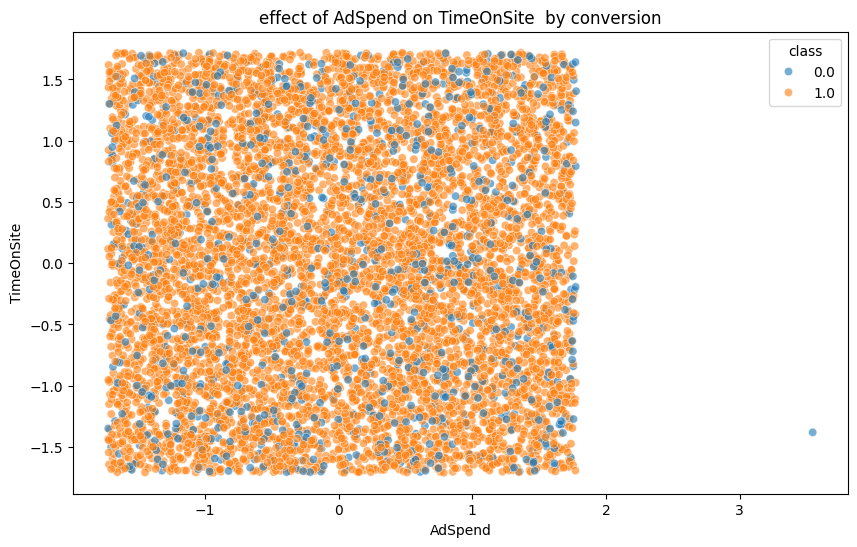

In [90]:
compare_features('AdSpend','TimeOnSite')

In [91]:
data_full

,Income,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,0.101574,-1.347602,-1.214117,1.460889,-0.509398,-1.589459,1.025786,1.434474,0.266142,-0.864705,1.217397,-0.107105
1,-1.078791,0.451688,-1.570472,-0.204948,-0.298274,1.555199,-0.386306,1.645815,-1.309914,-0.864705,-1.551950,-0.018922
2,-0.017923,0.451688,-1.167537,1.167457,0.101608,-1.729222,-1.342643,1.481420,-0.609445,0.536610,1.217397,1.298231
3,-1.109649,-1.347602,1.628843,-0.012217,1.038170,-1.309934,-1.312350,0.005265,-0.784562,1.237268,-1.551950,0.578066
4,-1.570133,-1.347602,0.823167,-1.355796,-0.790970,1.205793,-1.454935,0.702083,0.791495,-0.514376,0.525060,-1.091820
...,...,...,...,...,...,...,...,...,...,...,...,...
7952,0.716883,1.351333,1.760902,-0.452395,-0.113074,-1.240053,-0.397151,0.996009,1.316847,0.186281,-0.513445,1.711853
7953,1.477971,0.451688,1.752588,-0.434135,1.521878,-0.401477,0.663756,-0.106832,-0.959679,-0.164047,-0.167276,-0.032919
7954,0.070157,0.451688,1.776965,0.411614,-1.264899,-0.121952,-0.546639,1.404619,1.316847,0.886939,-1.205781,1.671961
7955,-1.575001,0.451688,1.758172,0.498420,0.048225,0.437098,-0.081369,-0.406005,-1.485032,-1.215034,-0.859613,-0.914754


### Aplly Model...

In [92]:


modelClass = HistGradientBoostingClassifier(max_iter=100, max_depth=6, random_state=42)

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

modelClass.fit(X_train, y_train, sample_weight=sample_weights)




HistGradientBoostingClassifier(max_depth=6, random_state=42)

In [93]:
y_pred=modelClass.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0], shape=(1592,))

In [94]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59       197
           1       0.95      0.93      0.94      1395

    accuracy                           0.89      1592
   macro avg       0.76      0.78      0.77      1592
weighted avg       0.90      0.89      0.90      1592



In [95]:

accuracy_score(y_test,y_pred)

0.8944723618090452

In [96]:


print(confusion_matrix(y_test, y_pred))


[[ 123   74]
 [  94 1301]]


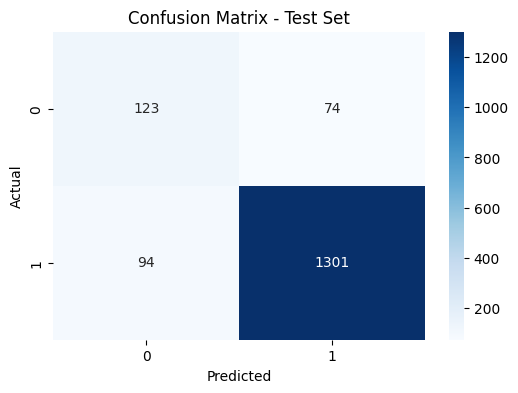

In [97]:


def plot_conf_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, modelClass.predict(X_test), title="Confusion Matrix - Test Set")


## ////////////----------///////////////

In [98]:


mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

print("\n📌 MLP Model Report:")
print(classification_report(y_test, y_pred_mlp))




📌 MLP Model Report:
              precision    recall  f1-score   support

           0       0.44      0.38      0.41       197
           1       0.91      0.93      0.92      1395

    accuracy                           0.86      1592
   macro avg       0.68      0.66      0.67      1592
weighted avg       0.86      0.86      0.86      1592



In [ ]:


models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5), 
    "Hist Gradient Boosting": HistGradientBoostingClassifier(max_iter=100, max_depth=6, random_state=42),  
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42),
}

results = {}

for name, model in models.items():
    print(f"\n📌 {name} Model Report:")

    if name == "Hist Gradient Boosting":
        sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
        model.fit(X_train, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(classification_report(y_test, y_pred))
    
    results[name] = pd.DataFrame(report).transpose()



📌 Random Forest Model Report:
              precision    recall  f1-score   support

           0       0.88      0.15      0.25       197
           1       0.89      1.00      0.94      1395

    accuracy                           0.89      1592
   macro avg       0.89      0.57      0.60      1592
weighted avg       0.89      0.89      0.86      1592


📌 Logistic Regression Model Report:
              precision    recall  f1-score   support

           0       0.28      0.75      0.40       197
           1       0.95      0.72      0.82      1395

    accuracy                           0.72      1592
   macro avg       0.61      0.74      0.61      1592
weighted avg       0.87      0.72      0.77      1592


📌 KNN Model Report:
              precision    recall  f1-score   support

           0       0.66      0.13      0.21       197
           1       0.89      0.99      0.94      1395

    accuracy                           0.88      1592
   macro avg       0.77      0.56      

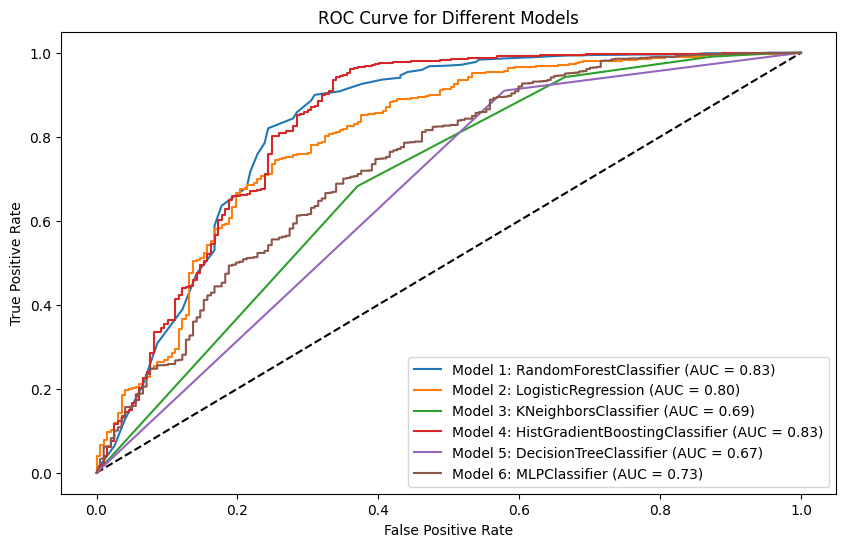

In [100]:


plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')

for i, model in  enumerate(models.values()):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Model {i+1}: {type(model).__name__} (AUC = {roc_auc:.2f})")

plt.title('ROC Curve for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

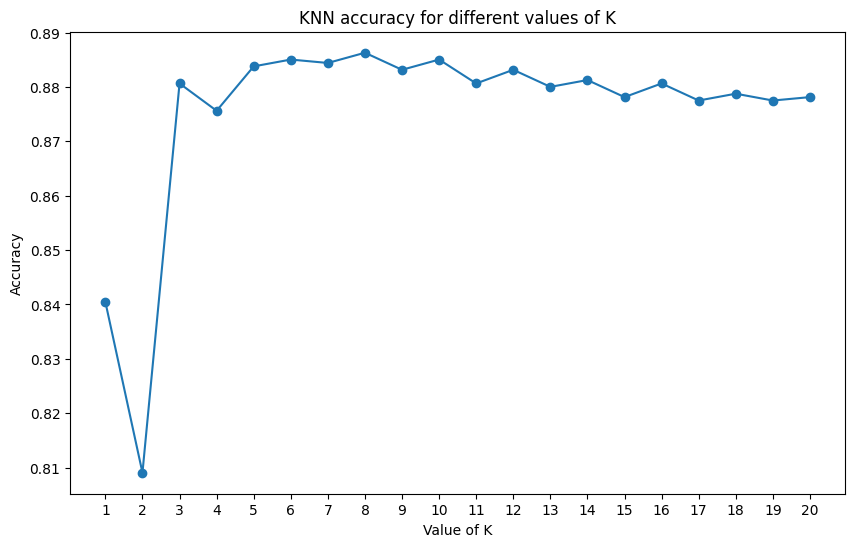

Best value of K: 8
Corresponding accuracy: 0.8863065326633166


In [101]:
# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

#### aplly for a streamlit app


In [102]:


categorical_features = ['CampaignType']
numeric_features = [
    'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
    'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens',
    'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints'
]


preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
])

sample_weights = compute_sample_weight(class_weight='balanced', y=y)

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('feature_select', SelectPercentile(score_func=f_classif, percentile=75)),
    ('model', HistGradientBoostingClassifier(max_iter=100, max_depth=6, random_state=42))
])


X_orig = data_final[numeric_features + categorical_features]
X_orig.to_csv("processed_dataset.csv", index=False)
y = data_final['Conversion']


pipeline.fit(X_orig, y, model__sample_weight=sample_weights)


joblib.dump(pipeline, 'GB.pkl')


['GB.pkl']

In [103]:
pp=pd.read_csv('processed_dataset.csv').head()

In [104]:
pp.head()

,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,CampaignType
0,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,11,2,8,2337,0
1,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,2,2,0,2463,2
2,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,8,4345,2
3,42925,9579.388247,0.153795,0.161316,6,2.125850,7.752831,5,8,0,3316,0
4,25615,7302.899852,0.040975,0.060977,42,1.753995,10.698672,14,3,6,930,0
